In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the notes_summary.csv file
df = pd.read_csv('notes_summary.csv')
#Drop the rows with id=template*
df = df[~df['id'].str.startswith('template')]
# Convert EPtot list string to separate columns
# First eval the string to convert to actual list
df['EPtot'] = df['EPtot'].apply(eval)
EPtot_cols = set()
# Create new columns for each EPtot value
for i in range(len(df['EPtot'].iloc[0])):  # Use first row to get number of values
    df[f'EPtot{i}'] = df['EPtot'].apply(lambda x: x[i])
    EPtot_cols.add(f'EPtot{i}')
# Drop the original EPtot column
df = df.drop('EPtot', axis=1)
tmp=df['EPtot0'].copy()
for col in EPtot_cols:
    df[col] = df[col] - tmp

True_value_id='run0'

    # Calculate RMSE between each run and the true values
true_values = df[df['id'] == True_value_id][list(EPtot_cols)].values.flatten()

# Initialize RMSE column
df['RMSE_EPtot'] = None

# Calculate RMSE for each run
for idx, row in df.iterrows():
    other_values = row[list(EPtot_cols)].values
    rmse = np.sqrt(np.mean((true_values - other_values) ** 2))
    df.at[idx, 'RMSE_EPtot'] = rmse

# Display results
print("\nRMSE values compared to", True_value_id)
print(df[['id', 'name', 'RMSE_EPtot']].to_string())





RMSE values compared to run0
     id            name RMSE_EPtot
0  run0  HF STO3G QUICK        0.0
1  run1   HF STO3G ORCA   0.647798


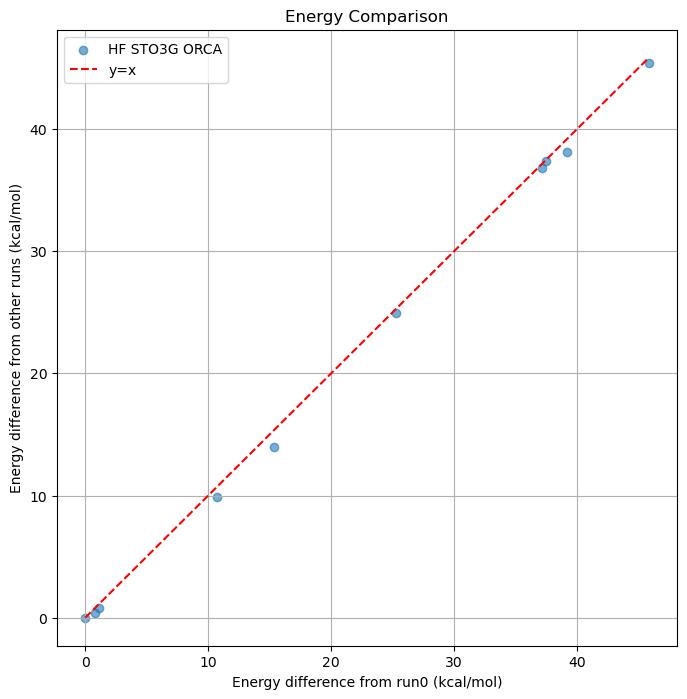

In [18]:
import matplotlib.pyplot as plt

# Get true values from reference run
true_values = df[df['id'] == True_value_id][[f'EPtot{i}' for i in range(10)]].values.flatten()

# Create scatter plot
plt.figure(figsize=(8,8))

# Plot values for each other run with different markers
markers = ['o', 's', '^', 'D']  # Different marker styles
for i, (idx, row) in enumerate(df[df['id'] != True_value_id].iterrows()):
    other_values = row[[f'EPtot{i}' for i in range(10)]].values
    plt.scatter(true_values, other_values, alpha=0.6, marker=markers[i], label=row['name'])

# Add y=x line
min_val = min(true_values.min(), df[[f'EPtot{i}' for i in range(10)]].values.min())
max_val = max(true_values.max(), df[[f'EPtot{i}' for i in range(10)]].values.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y=x')

plt.xlabel(f'Energy difference from {True_value_id} (kcal/mol)')
plt.ylabel('Energy difference from other runs (kcal/mol)')
plt.title('Energy Comparison')
plt.legend()
plt.grid(True)
plt.show()
